In [1]:
import pandas as pd
# calendar = pd.read_csv('calendar.csv.gz')
# listings = pd.read_csv('listings.csv')
listings2 = pd.read_csv('listings.csv.gz', low_memory=False)
# neighborhoods = pd.read_csv('neighbourhoods.csv')
# neighborhoods_geojson = pd.read_csv('neighbourhoods.geojson')
# reviews = pd.read_csv('reviews.csv')
# reviews2 = pd.read_csv('reviews.csv.gz')


In [2]:
listings.head()

NameError: name 'listings' is not defined

In [ ]:
listings2.columns

In [3]:
listings_short = listings2.filter(['price','accommodates','neighbourhood','zipcode','review_scores_rating', 'room_type','number_of_reviews' ], axis=1)

In [ ]:
listings_short.head(10)

In [4]:
import requests

r = requests.get("http://www.zillow.com/webservice/GetRegionChildren.htm?zws-id=X1-ZWz188d4jlv3m3_9k5bc&state=ny&city=new_york&childtype=zipcode")
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content)
zip_zindex = soup.findAll(['name', 'zindex'])
zipcode_list = soup.findAll('name')
median_prices_list = soup.findAll('zindex')


In [5]:
zipcodes={}
for element in zip_zindex:
    if element in zipcode_list:
        zipcodes[element.contents[0]]={'zipcode':element.contents}
        lastzip = element.contents
    if element in median_prices_list:
        zipcodes[lastzip[0]]={'med_zillow_price': element.contents[0]}


In [6]:
zipcodes

{'10025': {'med_zillow_price': '1034300'},
 '10023': {'zipcode': ['10023']},
 '10002': {'med_zillow_price': '877400'},
 '10467': {'med_zillow_price': '310500'},
 '11226': {'med_zillow_price': '633400'},
 '10016': {'zipcode': ['10016']},
 '11375': {'med_zillow_price': '770800'},
 '11235': {'med_zillow_price': '578700'},
 '10029': {'med_zillow_price': '719400'},
 '10009': {'med_zillow_price': '1051700'},
 '10011': {'zipcode': ['10011']},
 '10128': {'zipcode': ['10128']},
 '11201': {'med_zillow_price': '986200'},
 '10462': {'med_zillow_price': '104300'},
 '10456': {'med_zillow_price': '254600'},
 '11206': {'zipcode': ['11206']},
 '10003': {'med_zillow_price': '1410600'},
 '10463': {'med_zillow_price': '509700'},
 '11212': {'med_zillow_price': '312000'},
 '11230': {'med_zillow_price': '839000'},
 '11209': {'med_zillow_price': '825900'},
 '10024': {'zipcode': ['10024']},
 '11221': {'med_zillow_price': '728600'},
 '11214': {'med_zillow_price': '588100'},
 '10019': {'zipcode': ['10019']},
 '1

In [7]:
import pandas as pd
df = pd.DataFrame(zipcodes)
data = df.T
data["zip"]=data.index
data2 = data.drop(columns = 'zipcode')
# zillow_median['zipcode']=zillow_median['zip']
# zillow_median['median_zillow_homeprice'] = zillow_median['price']

In [8]:
data2.head(100)

,med_zillow_price,zip
10025,1034300,10025
10023,NaN,10023
10002,877400,10002
10467,310500,10467
11226,633400,11226
10016,NaN,10016
11375,770800,11375
11235,578700,11235
10029,719400,10029
10009,1051700,10009


In [ ]:
# zillow_median_2 = zillow_median.drop(columns = ['price', 'zip', 'median_price'])
# zillow_median_2.head()

In [44]:
full_data = data2.set_index('zip').join(listings_short.set_index('zipcode'))

In [45]:
full_data

,med_zillow_price,price,accommodates,neighbourhood,review_scores_rating,room_type,number_of_reviews
10001,2188500,$150.00,4.0,Chelsea,89.0,Entire home/apt,394.0
10001,2188500,$123.00,2.0,Chelsea,92.0,Private room,356.0
10001,2188500,$130.00,2.0,Chelsea,96.0,Entire home/apt,19.0
10001,2188500,$239.00,2.0,NaN,99.0,Entire home/apt,26.0
10001,2188500,$400.00,3.0,NaN,96.0,Entire home/apt,26.0
10001,2188500,$250.00,2.0,Chelsea,96.0,Entire home/apt,18.0
10001,2188500,$226.00,2.0,Chelsea,90.0,Entire home/apt,26.0
10001,2188500,$225.00,4.0,Chelsea,95.0,Entire home/apt,53.0
10001,2188500,$310.00,4.0,Chelsea,93.0,Entire home/apt,266.0
10001,2188500,$135.00,3.0,Flatiron District,93.0,Private room,199.0


In [26]:
import seaborn as sns
removed_null = full_data.dropna()
removed_null.dtypes

med_zillow_price         object
price                    object
accommodates            float64
neighbourhood            object
review_scores_rating    float64
room_type                object
number_of_reviews       float64
dtype: object

In [28]:
cols = ['med_zillow_price', 'price']
removed_null[cols] = removed_null[cols].apply(pd.to_numeric, errors='coerce', axis=1)
removed_null.dtypes

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


med_zillow_price        float64
price                   float64
accommodates            float64
neighbourhood            object
review_scores_rating    float64
room_type                object
number_of_reviews       float64
dtype: object

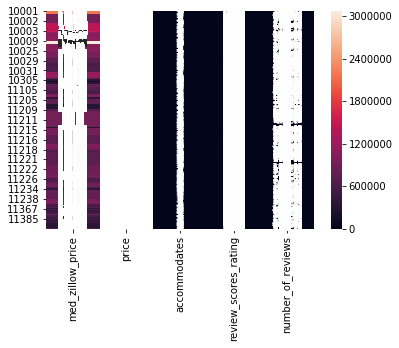

In [30]:

test = sns.heatmap(removed_null.drop(['room_type','neighbourhood'],axis=1), annot=True, annot_kws={"size": 7})


In [50]:
full_data.corr()
full_data.dtypes

med_zillow_price         object
price                    object
accommodates            float64
neighbourhood            object
review_scores_rating    float64
room_type                object
number_of_reviews       float64
dtype: object

In [54]:
test = full_data.dropna()

In [66]:
test[test.columns[1:2]].replace('[\$,]', '', regex=True).astype(float)


,price
10001,150.0
10001,123.0
10001,130.0
10001,250.0
10001,226.0
10001,225.0
10001,310.0
10001,135.0
10001,145.0
10001,139.0


,med_zillow_price,price,accommodates,neighbourhood,review_scores_rating,room_type,number_of_reviews,airbnb_price
10001,2188500,$150.00,4.0,Chelsea,89.0,Entire home/apt,394.0,150.0
10001,2188500,$123.00,2.0,Chelsea,92.0,Private room,356.0,123.0
10001,2188500,$130.00,2.0,Chelsea,96.0,Entire home/apt,19.0,130.0
10001,2188500,$250.00,2.0,Chelsea,96.0,Entire home/apt,18.0,250.0
10001,2188500,$226.00,2.0,Chelsea,90.0,Entire home/apt,26.0,226.0
